The Ornstein-Uhlenbeck SDE is given by
$$	\begin{align}
		d X & = -\lambda X dt+ \sigma d W \label{eq:sde_O-U}\\
		X(0) & =X_{0},\nonumber
	\end{align}$$
	where $\lambda>0$ and $\sigma>0$ are the given drift and diffusion constants, $X_0$ is given and $W(t)$ is a Brownian motion.
	The exact solution is 
$$	\begin{equation*}
		X(t)=\exp(-\lambda t)X_{0}+\int_{0}^{t} \sigma \exp\left(-\lambda(t-\tau)\right) d W(\tau).
	\end{equation*}$$
	The mean of the solution is then
	$$
	m(t) = E[X(t)] = \mathrm{e} ^{-\lambda t} X_0.
	$$
	We solve this problem with the Euler-Maruyama method, using the coefficient values
	$$
	\lambda =0.5,\quad \sigma = 1,
	$$
	over the interval $0 < t \le 1$ with an initial value $X(0)=4.$ We compute and plot $50$ realizations of the O-U process and superpose the mean process, $m(t),$ and  the $95\%$ quantiles computed by 
	$$
	  m(t ) \pm 1.96 \sqrt{P(t)},
	$$
	where the second moment is 
	$$
	 P(t) = \frac{\sigma^2}{2 \lambda} \left( 1 - \mathrm{e}^{-2\lambda t}\right).
	$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

lambd = 0.5
sigm2 = 1.
X0 = 4.
T  = 1.
dt = 0.01
N  = 50

t  = np.arange(0, T, dt)
Nt = len(t)

def M(t):
    return np.exp(-lambd*t)*X0

def P(t):
    return 0.5*(sigm2/lambd)*(1 - np.exp(-2*lambd*t))

For illustration, use a double loop over realizations and time. This could be made far more efficient by using a vectorized approach.

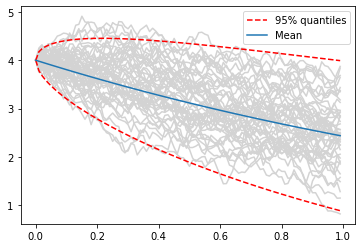

In [5]:
XX = np.zeros((Nt, N))
for n in range(N):
    X = X0
    for k in range(Nt):
        XX[k,n] = X
        X = X - lambd*X*dt + np.sqrt(dt)*np.random.randn(1)
# plot realizations and confidence interval
upper = M(t) + 1.96*np.sqrt(P(t))
lower = M(t) - 1.96*np.sqrt(P(t))
plt.plot(t,XX, color="lightgray")
plt.plot(t,upper, linestyle='--', color="red", label='95% quantiles')
plt.plot(t,lower, linestyle='--', color="red")
plt.plot(t,M(t),label="Mean")
plt.legend()